<a href="https://colab.research.google.com/github/Sujan-Sawant/Porter-Delivery-Time-Estimation/blob/main/Porter_Neural_Network_Case_Study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

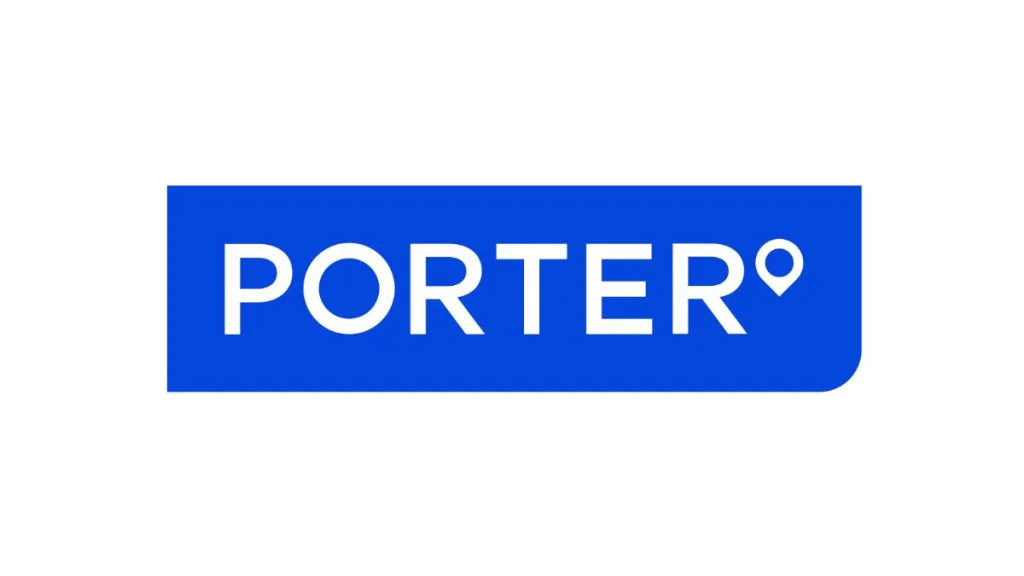

### **Context:**
- **Porter is India's Largest Marketplace for Intra-City Logistics. Leader in the country's $40 billion intra-city logistics market, Porter strives to improve the lives of 1,50,000+ driver-partners by providing them with consistent earning & independence. Currently, the company has serviced 5+ million customers**

### **Problem Statement**
- **Porter works with a wide range of restaurants for delivering their items directly to the people.**
- **Porter has a number of delivery partners available for delivering the food, from various restaurants and wants to get an estimated delivery time that it can provide the customers on the basis of what they are ordering, from where and also the delivery partners.**
- **This dataset has the required data to train a regression model that will do the delivery time estimation, based on all those features**


### **Data Dictionary**
- **Each row in this file corresponds to one unique delivery. Each column corresponds to a feature as explained below.**

**1.	market_id :** integer id for the market where the restaurant lies

**2.	created_at :** the timestamp at which the order was placed

**3.	actual_delivery_time :** the timestamp when the order was delivered

**4.	store_primary_category :** category for the restaurant

**5.	order_protocol :** integer code value for order protocol(how the order was placed ie: through porter, call to restaurant, pre booked, third part etc)

**6.	total_items subtotal :** final price of the order

**7.	num_distinct_items :** the number of distinct items in the order

**8.	min_item_price :** price of the cheapest item in the order

**9.	max_item_price :** price of the costliest item in order

**10.	total_onshift_partners :** number of delivery partners on duty at the time order was placed

**11.	total_busy_partners :** number of delivery partners attending to other tasks

**12.	total_outstanding_orders :** total number of orders to be fulfilled at the moment

**13.	estimated_store_to_consumer_driving_duration :** approximate travel time from restaurant to customer


In [ ]:
# Downloading the data
! gdown 1kkgBGldeswHBgVKEJiqqG7VZvqZNMc-5

Downloading...
From: https://drive.google.com/uc?id=1kkgBGldeswHBgVKEJiqqG7VZvqZNMc-5
To: /content/data_2.csv
100% 15.7M/15.7M [00:00<00:00, 152MB/s]


In [ ]:
# Importing the Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [ ]:
# Reading or Loading a CSV file into a pandas DataFrame.
df = pd.read_csv("/content/data_2.csv")

In [ ]:
# Viewing the first few rows of a DataFrame.
df.head()

,market_id,created_at,actual_delivery_time,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_store_to_consumer_driving_duration
0,1.0,2015-02-06 22:24:17,2015-02-06 23:11:17,4,1.0,4,3441,4,557,1239,33.0,14.0,21.0,861.0
1,2.0,2015-02-10 21:49:25,2015-02-10 22:33:25,46,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,690.0
2,2.0,2015-02-16 00:11:35,2015-02-16 01:06:35,36,3.0,4,4771,3,820,1604,8.0,6.0,18.0,289.0
3,1.0,2015-02-12 03:36:46,2015-02-12 04:35:46,38,1.0,1,1525,1,1525,1525,5.0,6.0,8.0,795.0
4,1.0,2015-01-27 02:12:36,2015-01-27 02:58:36,38,1.0,2,3620,2,1425,2195,5.0,5.0,7.0,205.0


In [ ]:
# Viewing the last few rows of a DataFrame.
df.tail()

,market_id,created_at,actual_delivery_time,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_store_to_consumer_driving_duration
175772,1.0,2015-02-17 00:19:41,2015-02-17 01:02:41,28,4.0,3,1389,3,345,649,17.0,17.0,23.0,331.0
175773,1.0,2015-02-13 00:01:59,2015-02-13 01:03:59,28,4.0,6,3010,4,405,825,12.0,11.0,14.0,915.0
175774,1.0,2015-01-24 04:46:08,2015-01-24 05:32:08,28,4.0,5,1836,3,300,399,39.0,41.0,40.0,795.0
175775,1.0,2015-02-01 18:18:15,2015-02-01 19:03:15,58,1.0,1,1175,1,535,535,7.0,7.0,12.0,384.0
175776,1.0,2015-02-08 19:24:33,2015-02-08 20:01:33,58,1.0,4,2605,4,425,750,20.0,20.0,23.0,134.0


In [ ]:
# Retrieving the dimensions of a DataFrame (Rows, Columns).
df.shape

(175777, 14)

In [ ]:
# Retrieving the column labels (names) of a DataFrame .
df.columns

Index(['market_id', 'created_at', 'actual_delivery_time',
       'store_primary_category', 'order_protocol', 'total_items', 'subtotal',
       'num_distinct_items', 'min_item_price', 'max_item_price',
       'total_onshift_dashers', 'total_busy_dashers',
       'total_outstanding_orders',
       'estimated_store_to_consumer_driving_duration'],
      dtype='object')

In [ ]:
# Retrive the overview of a DataFrame's structure and content.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175777 entries, 0 to 175776
Data columns (total 14 columns):
 #   Column                                        Non-Null Count   Dtype  
---  ------                                        --------------   -----  
 0   market_id                                     175777 non-null  float64
 1   created_at                                    175777 non-null  object 
 2   actual_delivery_time                          175777 non-null  object 
 3   store_primary_category                        175777 non-null  int64  
 4   order_protocol                                175777 non-null  float64
 5   total_items                                   175777 non-null  int64  
 6   subtotal                                      175777 non-null  int64  
 7   num_distinct_items                            175777 non-null  int64  
 8   min_item_price                                175777 non-null  int64  
 9   max_item_price                                17

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
market_id,175777.0,2.743726,1.330963,1.0,2.0,2.0,4.0,6.0
store_primary_category,175777.0,35.887949,20.728254,0.0,18.0,38.0,55.0,72.0
order_protocol,175777.0,2.911752,1.513128,1.0,1.0,3.0,4.0,7.0
total_items,175777.0,3.204976,2.674055,1.0,2.0,3.0,4.0,411.0
subtotal,175777.0,2697.111147,1828.554893,0.0,1412.0,2224.0,3410.0,26800.0
num_distinct_items,175777.0,2.675060,1.625681,1.0,1.0,2.0,3.0,20.0
min_item_price,175777.0,684.965433,519.882924,-86.0,299.0,595.0,942.0,14700.0
max_item_price,175777.0,1160.158616,560.828571,0.0,799.0,1095.0,1395.0,14700.0
total_onshift_dashers,175777.0,44.918664,34.544724,-4.0,17.0,37.0,66.0,171.0
total_busy_dashers,175777.0,41.861381,32.168505,-5.0,15.0,35.0,63.0,154.0


### **EDA**

In [ ]:
# Checking for null values
df.isnull().sum()

,0
market_id,0
created_at,0
actual_delivery_time,0
store_primary_category,0
order_protocol,0
total_items,0
subtotal,0
num_distinct_items,0
min_item_price,0
max_item_price,0


In [ ]:
numeric = df.select_dtypes(include='number').columns
numeric

Index(['market_id', 'store_primary_category', 'order_protocol', 'total_items',
       'subtotal', 'num_distinct_items', 'min_item_price', 'max_item_price',
       'total_onshift_dashers', 'total_busy_dashers',
       'total_outstanding_orders',
       'estimated_store_to_consumer_driving_duration'],
      dtype='object')

In [ ]:
df.columns

Index(['market_id', 'created_at', 'actual_delivery_time',
       'store_primary_category', 'order_protocol', 'total_items', 'subtotal',
       'num_distinct_items', 'min_item_price', 'max_item_price',
       'total_onshift_dashers', 'total_busy_dashers',
       'total_outstanding_orders',
       'estimated_store_to_consumer_driving_duration'],
      dtype='object')

In [ ]:
df.head()

,market_id,created_at,actual_delivery_time,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_store_to_consumer_driving_duration
0,1.0,2015-02-06 22:24:17,2015-02-06 23:11:17,4,1.0,4,3441,4,557,1239,33.0,14.0,21.0,861.0
1,2.0,2015-02-10 21:49:25,2015-02-10 22:33:25,46,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,690.0
2,2.0,2015-02-16 00:11:35,2015-02-16 01:06:35,36,3.0,4,4771,3,820,1604,8.0,6.0,18.0,289.0
3,1.0,2015-02-12 03:36:46,2015-02-12 04:35:46,38,1.0,1,1525,1,1525,1525,5.0,6.0,8.0,795.0
4,1.0,2015-01-27 02:12:36,2015-01-27 02:58:36,38,1.0,2,3620,2,1425,2195,5.0,5.0,7.0,205.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175777 entries, 0 to 175776
Data columns (total 14 columns):
 #   Column                                        Non-Null Count   Dtype  
---  ------                                        --------------   -----  
 0   market_id                                     175777 non-null  float64
 1   created_at                                    175777 non-null  object 
 2   actual_delivery_time                          175777 non-null  object 
 3   store_primary_category                        175777 non-null  int64  
 4   order_protocol                                175777 non-null  float64
 5   total_items                                   175777 non-null  int64  
 6   subtotal                                      175777 non-null  int64  
 7   num_distinct_items                            175777 non-null  int64  
 8   min_item_price                                175777 non-null  int64  
 9   max_item_price                                17

### **Data Cleaning and Feature Engineering**

In [ ]:
# Converting necessary columns into datetime format
df["actual_delivery_time"] = pd.to_datetime(df["actual_delivery_time"])
df["created_at"] = pd.to_datetime(df["created_at"])

In [ ]:
# Convert driving duration column in minutes
df["estimated_store_to_consumer_driving_duration_minutes"] = round(df["estimated_store_to_consumer_driving_duration"]/60,2)

In [ ]:
# Creating the target column time taken in each delivery from order timestamp (created_at) and delivery timestamp (actual_delivery_time)
df["time_taken_to_delivery"] = df["actual_delivery_time"] - df["created_at"]

In [ ]:
# Getting hour and day of the week from order time
df["hour_of_order"] = df["created_at"].dt.hour
df["week_of_order"] = df["created_at"].dt.day_name()

In [ ]:
df["time_taken_to_delivery_minutes"] = df["time_taken_to_delivery"].dt.seconds // 60

df.drop(columns=["time_taken_to_delivery","created_at","actual_delivery_time","estimated_store_to_consumer_driving_duration"], inplace=True)

In [ ]:
df.head()

,market_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_store_to_consumer_driving_duration_minutes,hour_of_order,week_of_order,time_taken_to_delivery_minutes
0,1.0,4,1.0,4,3441,4,557,1239,33.0,14.0,21.0,14.35,22,Friday,47
1,2.0,46,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,11.50,21,Tuesday,44
2,2.0,36,3.0,4,4771,3,820,1604,8.0,6.0,18.0,4.82,0,Monday,55
3,1.0,38,1.0,1,1525,1,1525,1525,5.0,6.0,8.0,13.25,3,Thursday,59
4,1.0,38,1.0,2,3620,2,1425,2195,5.0,5.0,7.0,3.42,2,Tuesday,46


## Outliers check reamining

## <font color = "red" >**Data visualization**

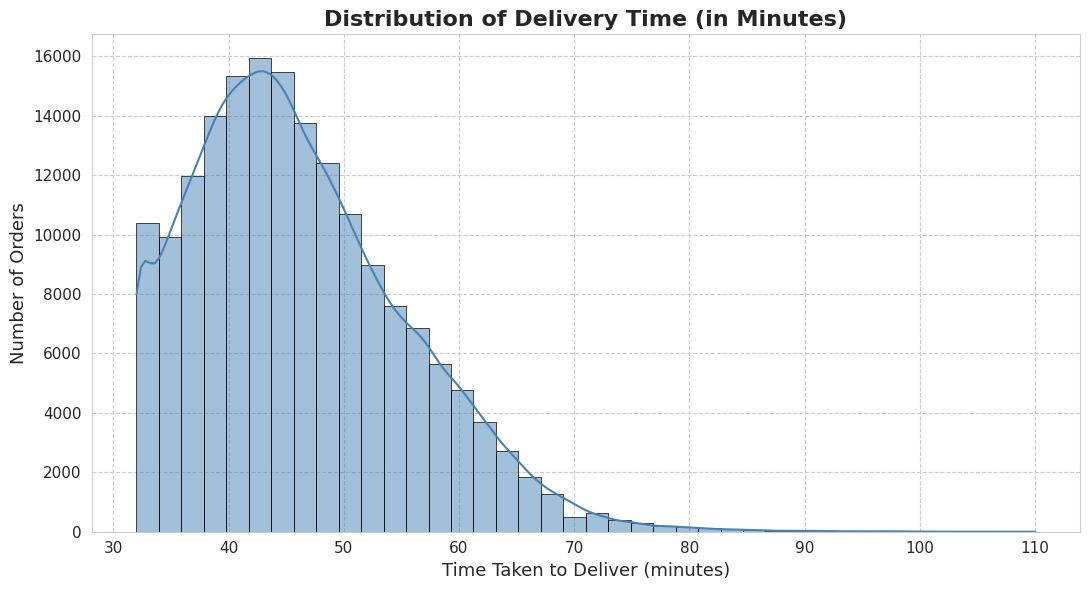

In [ ]:
plt.figure(figsize=(11, 6))
sns.set_style("whitegrid")  # clean background with grid

sns.histplot(
    df["time_taken_to_delivery_minutes"],
    kde=True,
    bins=40,
    color="steelblue",
    edgecolor="black",
    linewidth=0.5

)

plt.title("Distribution of Delivery Time (in Minutes)", fontsize=16, fontweight="bold")
plt.xlabel("Time Taken to Deliver (minutes)", fontsize=13)
plt.ylabel("Number of Orders", fontsize=13)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.grid(True, linestyle="--")
plt.tight_layout()
plt.show()


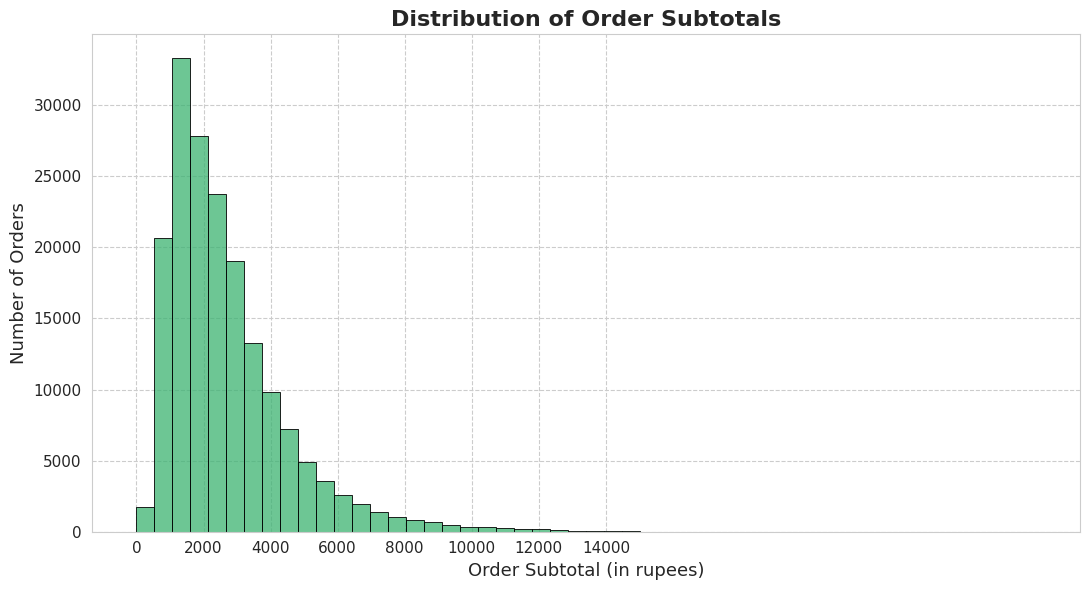

In [ ]:
plt.figure(figsize=(11, 6))
sns.set_style("whitegrid")

sns.histplot(
    df["subtotal"],
    bins=50,
    color="mediumseagreen",
    edgecolor="black",
    linewidth=0.6
)

plt.title("Distribution of Order Subtotals", fontsize=16, fontweight="bold")
plt.xlabel("Order Subtotal (in rupees)", fontsize=13)
plt.ylabel("Number of Orders", fontsize=13)
plt.xticks(range(0, 15000, 2000), fontsize=11)
plt.yticks(fontsize=11)
plt.grid(True, linestyle="--")
plt.tight_layout()
plt.show()


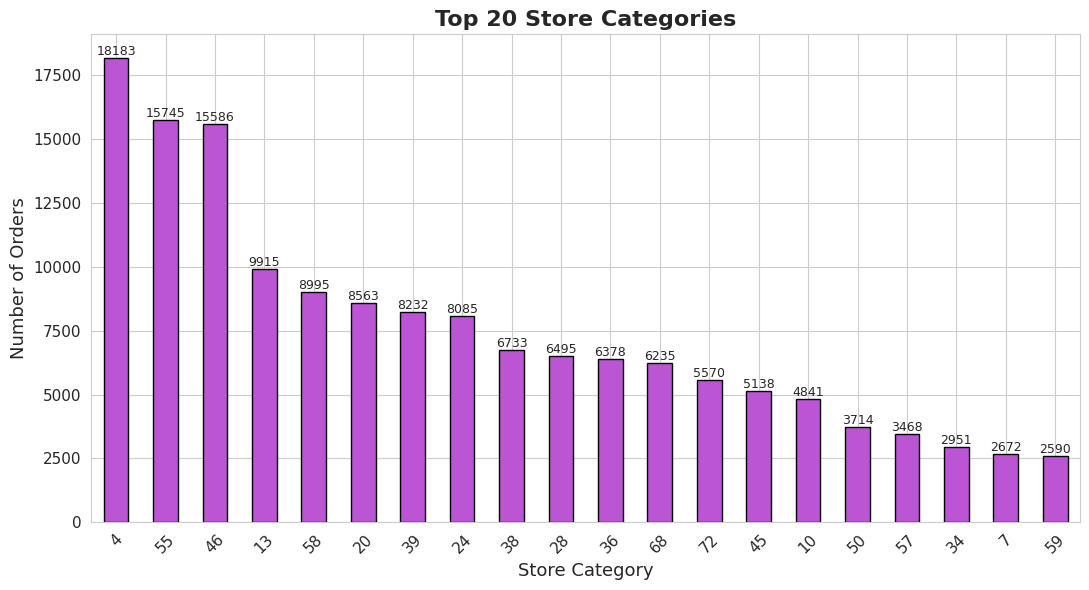

In [ ]:
plt.figure(figsize=(11, 6))
sns.set_style("whitegrid")

# Get top 20 store categories
top_categories = df["store_primary_category"].value_counts().head(20)

# Plot vertical bar chart
ax = top_categories.plot(
    kind="bar",
    color="mediumorchid",
    edgecolor="black"
)

for i in ax.containers:
    ax.bar_label(i, fontsize=9)

# Title and labels
plt.title("Top 20 Store Categories", fontsize=16, fontweight="bold")
plt.xlabel("Store Category", fontsize=13)
plt.ylabel("Number of Orders", fontsize=13)
plt.xticks(rotation=45, fontsize=11)
plt.yticks(fontsize=11)
plt.tight_layout()
plt.show()


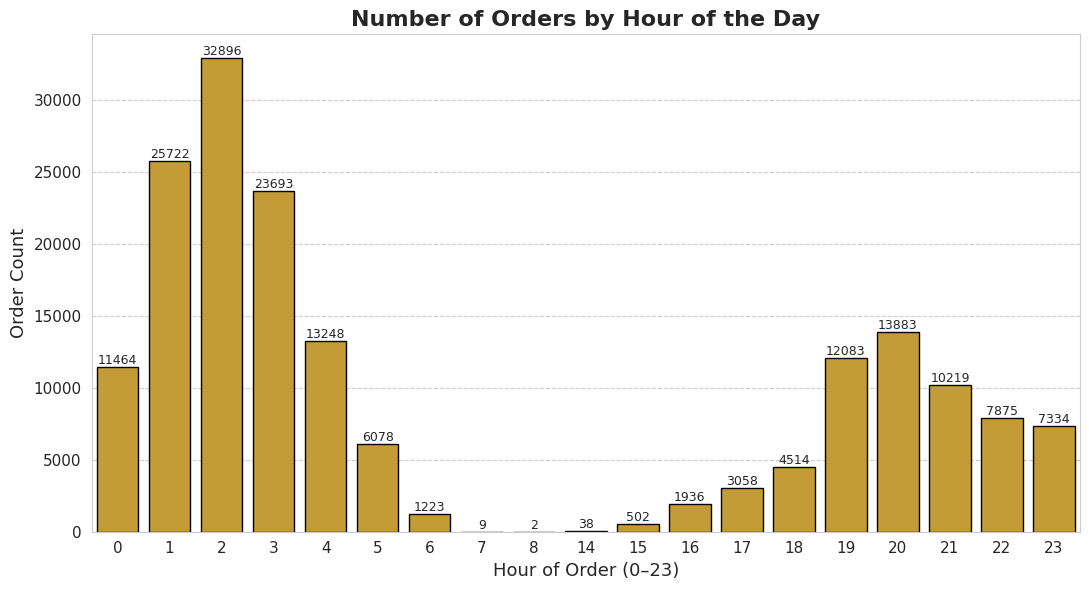

In [ ]:
plt.figure(figsize=(11, 6))
sns.set_style("whitegrid")

ax = sns.countplot(
    x="hour_of_order",
    data=df,
    color="goldenrod",
    edgecolor="black"
)

for i in ax.containers:
    ax.bar_label(i, fontsize=9)

plt.title("Number of Orders by Hour of the Day", fontsize=16, fontweight="bold")
plt.xlabel("Hour of Order (0–23)", fontsize=13)
plt.ylabel("Order Count", fontsize=13)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.grid(axis="y", linestyle="--")

plt.tight_layout()
plt.show()


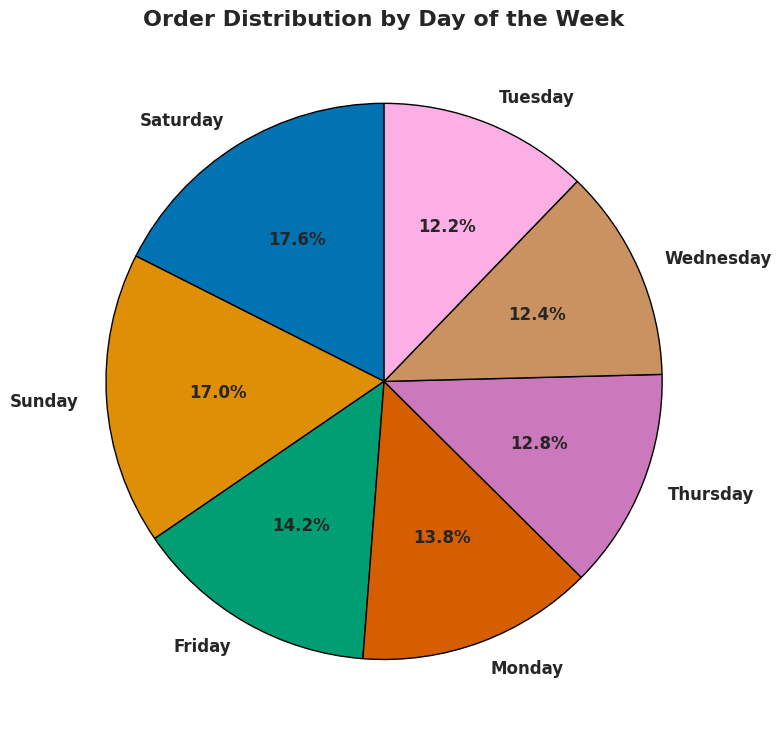

In [ ]:
plt.figure(figsize=(8, 8))
colors = sns.color_palette("colorblind")

count = df["week_of_order"].value_counts()

plt.pie(
    count,
    labels=count.index,
    autopct="%1.1f%%",
    startangle=90,
    colors=colors,
    wedgeprops={"edgecolor": "black"},
    textprops={"fontsize": 12, "fontweight": "bold"}
)

plt.title("Order Distribution by Day of the Week", fontsize=16, fontweight="bold")
plt.tight_layout()
plt.show()

In [ ]:
df.head(5)

,market_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_store_to_consumer_driving_duration_minutes,hour_of_order,week_of_order,time_taken_to_delivery_minutes
0,1.0,4,1.0,4,3441,4,557,1239,33.0,14.0,21.0,14.35,22,Friday,47
1,2.0,46,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,11.50,21,Tuesday,44
2,2.0,36,3.0,4,4771,3,820,1604,8.0,6.0,18.0,4.82,0,Monday,55
3,1.0,38,1.0,1,1525,1,1525,1525,5.0,6.0,8.0,13.25,3,Thursday,59
4,1.0,38,1.0,2,3620,2,1425,2195,5.0,5.0,7.0,3.42,2,Tuesday,46


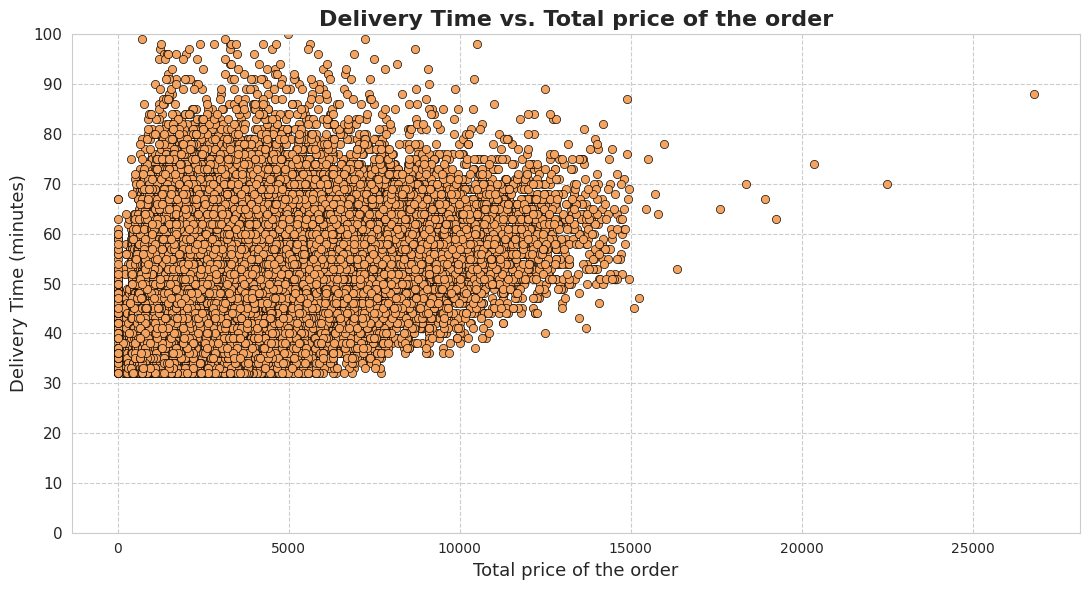

In [ ]:
plt.figure(figsize=(11, 6))
sns.set_style("whitegrid")

# Enhanced scatter plot
sns.scatterplot(
    x="subtotal",
    y="time_taken_to_delivery_minutes",
    data=df,
    s=35,
    color="sandybrown",
    edgecolor="black"
)

# Title and axis labels
plt.title("Delivery Time vs. Total price of the order", fontsize=16, fontweight="bold")
plt.xlabel("Total price of the order", fontsize=13)
plt.ylabel("Delivery Time (minutes)", fontsize=13)
plt.yticks(range(0, 101, 10), fontsize=11)
plt.ylim(0, 100)

plt.grid(True,linestyle="--")
plt.tight_layout()
plt.show()


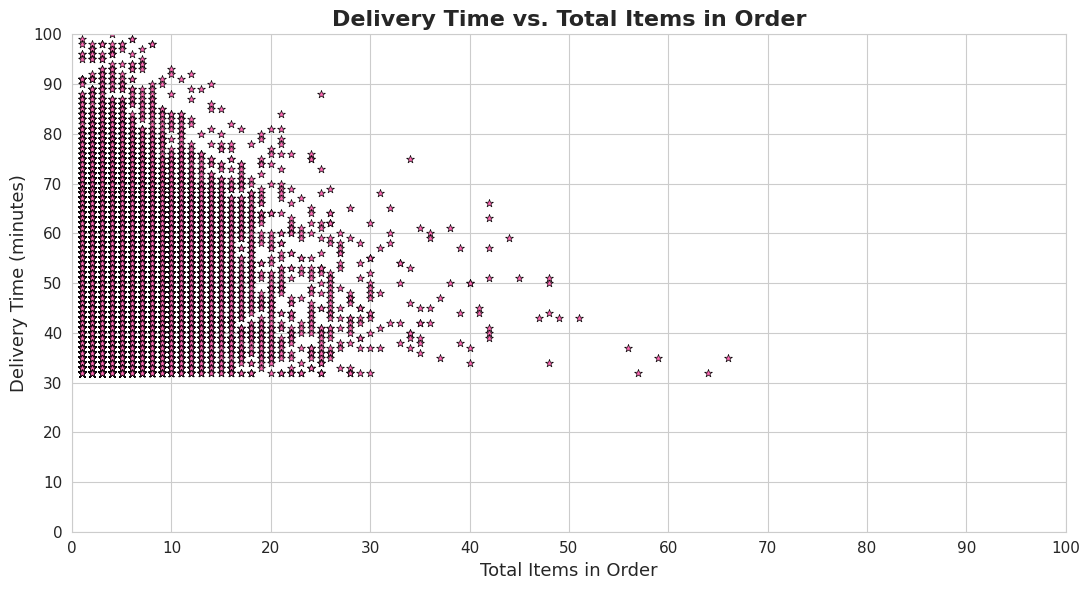

In [ ]:
plt.figure(figsize=(11, 6))
sns.set_style("whitegrid")

# Enhanced scatter plot
sns.scatterplot(
    x="total_items",
    y="time_taken_to_delivery_minutes",
    data=df,
    s=35,
    color="#ff69b4",
    edgecolor="black",
    marker='*'
)

# Title and axis labels
plt.title("Delivery Time vs. Total Items in Order", fontsize=16, fontweight="bold")
plt.xlabel("Total Items in Order", fontsize=13)
plt.ylabel("Delivery Time (minutes)", fontsize=13)


plt.xticks(range(0, 101, 10), fontsize=11)
plt.yticks(range(0, 101, 10), fontsize=11)
plt.xlim(0, 100)
plt.ylim(0, 100)
plt.grid(True)
plt.tight_layout()
plt.show()


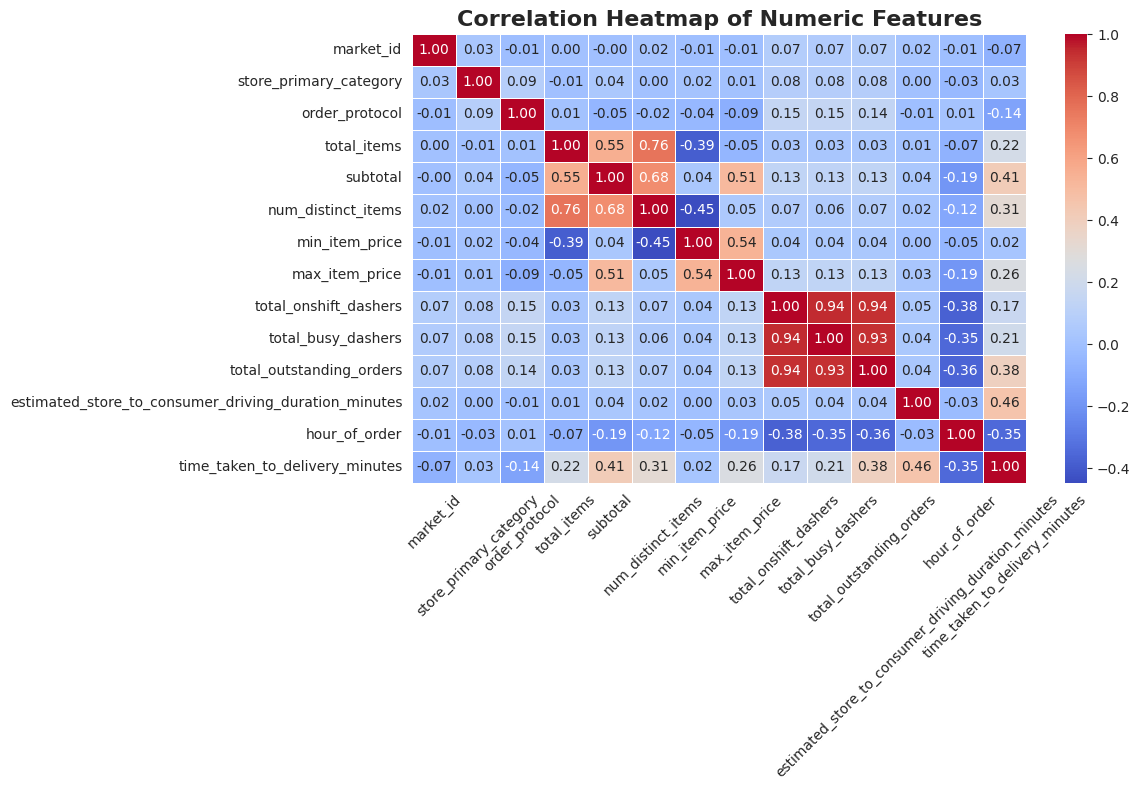

In [ ]:
num = df.select_dtypes(include = [np.number])
# Compute correlation matrix
corr_matrix = num.corr()

# Set figure size and style
plt.figure(figsize=(12, 8))
sns.set_style("whitegrid")

# Create heatmap
sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    linewidths=0.5
 )

plt.title("Correlation Heatmap of Numeric Features", fontsize=16, fontweight="bold")
plt.xticks(rotation=45,fontsize=10)
plt.yticks(rotation=0, fontsize=10)
plt.tight_layout()
plt.show()


### **Outler Treatment**

In [ ]:
numeric_columns = df.select_dtypes(include = np.number)
numeric_columns.columns


Index(['market_id', 'store_primary_category', 'order_protocol', 'total_items',
       'subtotal', 'num_distinct_items', 'min_item_price', 'max_item_price',
       'total_onshift_dashers', 'total_busy_dashers',
       'total_outstanding_orders',
       'estimated_store_to_consumer_driving_duration_minutes', 'hour_of_order',
       'time_taken_to_delivery_minutes'],
      dtype='object')

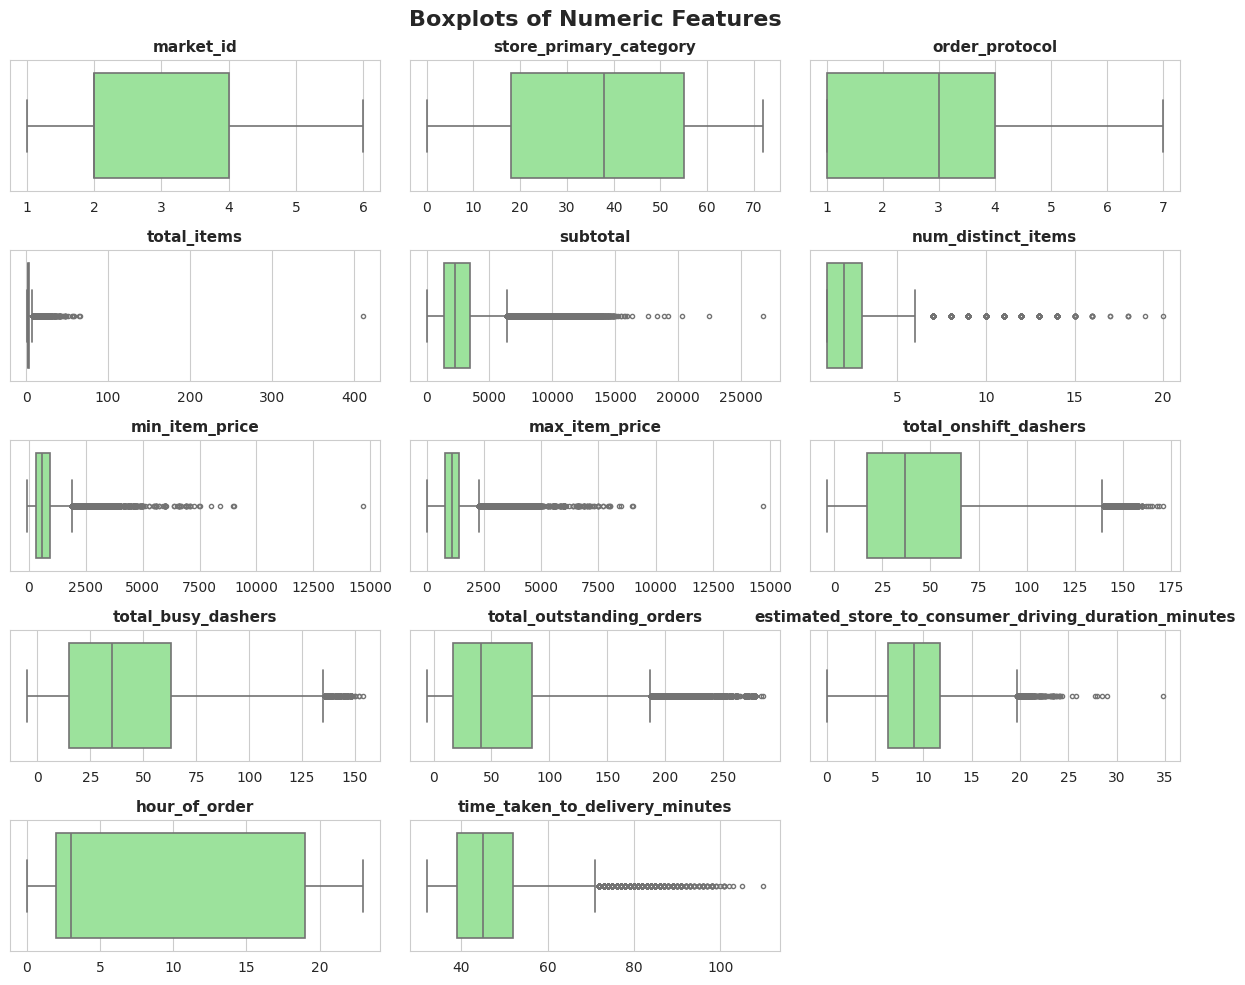

In [ ]:
plt.figure(figsize=(12, 10))
sns.set_style("whitegrid")

for i, col in enumerate(numeric_columns.columns):
    plt.subplot(5, 3, i + 1)
    sns.boxplot(x=df[col], color="lightgreen", linewidth=1.2, fliersize=3)
    plt.title(col, fontsize=11, fontweight="bold")
    plt.xlabel("")  # Remove x-axis label clutter

plt.suptitle("Boxplots of Numeric Features", fontsize=16, fontweight="bold")
plt.tight_layout()
plt.show()


### **Detecting outliers using the IQR method and replacing them with the respective column's median value.**

In [ ]:
def identify_outliers(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data < lower_bound) | (data > upper_bound)]

outlier_counts = {}  # Dictionary to store outlier counts for each column

for col in numeric_columns.columns:
    outliers = identify_outliers(numeric_columns[col])
    outlier_counts[col] = len(outliers)

# Print the count of outliers for each numerical column
for col, count in outlier_counts.items():
    print(f"Percentage of outliers present in {col}: {round((count/df.shape[0]) * 100,3)}")


Percentage of outliers present in market_id: 0.0
Percentage of outliers present in store_primary_category: 0.0
Percentage of outliers present in order_protocol: 0.0
Percentage of outliers present in total_items: 4.828
Percentage of outliers present in subtotal: 4.58
Percentage of outliers present in num_distinct_items: 2.986
Percentage of outliers present in min_item_price: 2.302
Percentage of outliers present in max_item_price: 3.956
Percentage of outliers present in total_onshift_dashers: 0.687
Percentage of outliers present in total_busy_dashers: 0.263
Percentage of outliers present in total_outstanding_orders: 2.955
Percentage of outliers present in estimated_store_to_consumer_driving_duration_minutes: 0.177
Percentage of outliers present in hour_of_order: 0.0
Percentage of outliers present in time_taken_to_delivery_minutes: 0.995


In [ ]:
# Fill the outlier values with the medium values
   # Calculatr median values for the respective columns
median_values =  numeric_columns[col].median()

    # Fill the outlier values with median values
numeric_columns[col] = numeric_columns[col].apply(lambda x: median_values if x < lower_bound or x > upper_bound else x )



### **Model Training**

In [ ]:
df.columns

Index(['market_id', 'store_primary_category', 'order_protocol', 'total_items',
       'subtotal', 'num_distinct_items', 'min_item_price', 'max_item_price',
       'total_onshift_dashers', 'total_busy_dashers',
       'total_outstanding_orders',
       'estimated_store_to_consumer_driving_duration_minutes', 'hour_of_order',
       'week_of_order', 'time_taken_to_delivery_minutes'],
      dtype='object')

In [ ]:
X = df.drop(columns = ["time_taken_to_delivery_minutes"])
y = df["time_taken_to_delivery_minutes"]


In [ ]:
X = pd.get_dummies(X, columns=["week_of_order"], dtype=int)

X.head()

,market_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_store_to_consumer_driving_duration_minutes,hour_of_order,week_of_order_Friday,week_of_order_Monday,week_of_order_Saturday,week_of_order_Sunday,week_of_order_Thursday,week_of_order_Tuesday,week_of_order_Wednesday
0,1.0,4,1.0,4,3441,4,557,1239,33.0,14.0,21.0,14.35,22,1,0,0,0,0,0,0
1,2.0,46,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,11.50,21,0,0,0,0,0,1,0
2,2.0,36,3.0,4,4771,3,820,1604,8.0,6.0,18.0,4.82,0,0,1,0,0,0,0,0
3,1.0,38,1.0,1,1525,1,1525,1525,5.0,6.0,8.0,13.25,3,0,0,0,0,1,0,0
4,1.0,38,1.0,2,3620,2,1425,2195,5.0,5.0,7.0,3.42,2,0,0,0,0,0,1,0


In [ ]:
y.head(5)

,time_taken_to_delivery_minutes
0,47
1,44
2,55
3,59
4,46


In [ ]:
# Train-Test Split
from sklearn.model_selection import train_test_split





X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.1, random_state=42)



print(f'{"Dataset":<15} | {"Features Shape/Target Shape":<20}')
print('-' * 60)
print('Training_data   : ', X_train.shape, y_train.shape)
print('Validation_data :', X_val.shape, y_val.shape)
print('Test_data       : ', X_test.shape, y_test.shape)

Dataset         | Features Shape/Target Shape
------------------------------------------------------------
Training_data   :  (142379, 20) (142379,)
Validation_data : (15820, 20) (15820,)
Test_data       :  (17578, 20) (17578,)


In [ ]:
# Scalling Data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

In [ ]:
X_train

array([[-1.31133668,  1.06650653, -0.60441842, ..., -0.38357023,
        -0.37316315,  2.65080717],
       [ 0.94278694, -1.53984365, -1.26484196, ..., -0.38357023,
        -0.37316315, -0.37724358],
       [-0.55996214, -0.57452877,  1.37685221, ..., -0.38357023,
         2.67979301, -0.37724358],
       ...,
       [-0.55996214,  0.4873176 ,  1.37685221, ..., -0.38357023,
        -0.37316315, -0.37724358],
       [-0.55996214, -1.53984365,  0.05600513, ..., -0.38357023,
         2.67979301, -0.37724358],
       [ 0.94278694,  0.43905186,  0.05600513, ..., -0.38357023,
        -0.37316315, -0.37724358]])

### **Baseline Model**

Now that we have the data ready,
- Lets create a simple 6 layered base model


|Layer| |Descrption|
|:--| |:--|
|**L1**| |Is the Input Layer |
|**L2**| |Contains 64 Neurons|
|**L3**| |Contains 32 Neurons|
|**L4**| |Contains 16 Neurons|
|**L5**| |Is the Output Layer |


<br>

- We will use ReLU as the Activation function

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, Sequential, callbacks, optimizers
from tensorflow.keras.layers import Dense



np.random.seed(42)
tf.random.set_seed(42)

In [ ]:
def create_baseline():

    model = Sequential([
        layers.Input(shape=(X_train.shape[1],), name="feature_input"),
        layers.Dense(64, activation="relu", kernel_initializer="glorot_uniform"),
        layers.Dense(32, activation="relu", kernel_initializer="glorot_uniform"),
        layers.Dense(16, activation="relu", kernel_initializer="glorot_uniform"),
        layers.Dense(1, name="delivery_minutes")
    ])

    model.compile(
        optimizer=optimizers.Adam(learning_rate=1e-3),
        loss="mae",
        metrics=["mse"]
    )
    return model




In [ ]:
model = create_baseline()
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 64)             │         1,344 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ delivery_minutes (Dense)        │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,969 (15.50 KB)

 Trainable params: 3,969 (15.50 KB)

 Non-trainable params: 0 (0.00 B)

### **Fitting the model on data and check for result**

In [ ]:
early_stop = callbacks.EarlyStopping(
    monitor="val_loss", patience=3, restore_best_weights=True
)

history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=30,
    batch_size=256,
    callbacks=[early_stop],
    verbose=2
)


# EVALUATE

test_mae, test_mse = model.evaluate(X_test, y_test, verbose=0)
print(f"\nTest MAE (minutes): {test_mae:.2f}")

Epoch 1/30
557/557 - 3s - 6ms/step - loss: 10.3285 - mse: 331.9131 - val_loss: 1.9971 - val_mse: 7.6408
Epoch 2/30
557/557 - 1s - 2ms/step - loss: 1.4919 - mse: 5.2901 - val_loss: 1.1562 - val_mse: 2.6409
Epoch 3/30
557/557 - 1s - 2ms/step - loss: 0.9902 - mse: 2.3538 - val_loss: 0.8155 - val_mse: 1.3185
Epoch 4/30
557/557 - 1s - 2ms/step - loss: 0.7127 - mse: 1.2021 - val_loss: 0.6257 - val_mse: 0.7552
Epoch 5/30
557/557 - 1s - 2ms/step - loss: 0.5613 - mse: 0.7029 - val_loss: 0.5212 - val_mse: 0.5088
Epoch 6/30
557/557 - 3s - 5ms/step - loss: 0.4824 - mse: 0.4778 - val_loss: 0.4494 - val_mse: 0.3744
Epoch 7/30
557/557 - 2s - 3ms/step - loss: 0.4380 - mse: 0.3686 - val_loss: 0.4206 - val_mse: 0.3178
Epoch 8/30
557/557 - 2s - 4ms/step - loss: 0.4090 - mse: 0.3084 - val_loss: 0.4028 - val_mse: 0.2859
Epoch 9/30
557/557 - 2s - 3ms/step - loss: 0.3895 - mse: 0.2714 - val_loss: 0.3767 - val_mse: 0.2455
Epoch 10/30
557/557 - 4s - 6ms/step - loss: 0.3780 - mse: 0.2482 - val_loss: 0.3719 - va

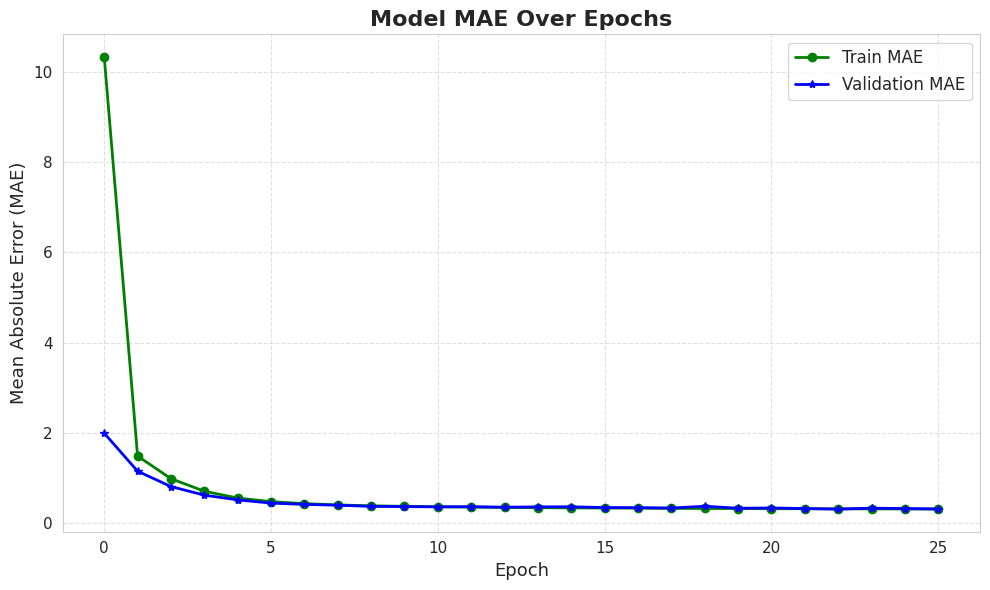

In [ ]:
epochs      = history.epoch
train_loss  = history.history["loss"]
val_loss    = history.history["val_loss"]

# Plot
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")

plt.plot(epochs, train_loss, label="Train MAE", color="green", linewidth=2, marker="o")
plt.plot(epochs, val_loss,   label="Validation MAE", color="blue", linewidth=2, marker="*")
plt.title("Model MAE Over Epochs", fontsize=16, fontweight="bold")
plt.xlabel("Epoch", fontsize=13)
plt.ylabel("Mean Absolute Error (MAE)", fontsize=13)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.legend(fontsize=12)
plt.grid(True, linestyle="--", alpha=0.6)

plt.tight_layout()
plt.show()


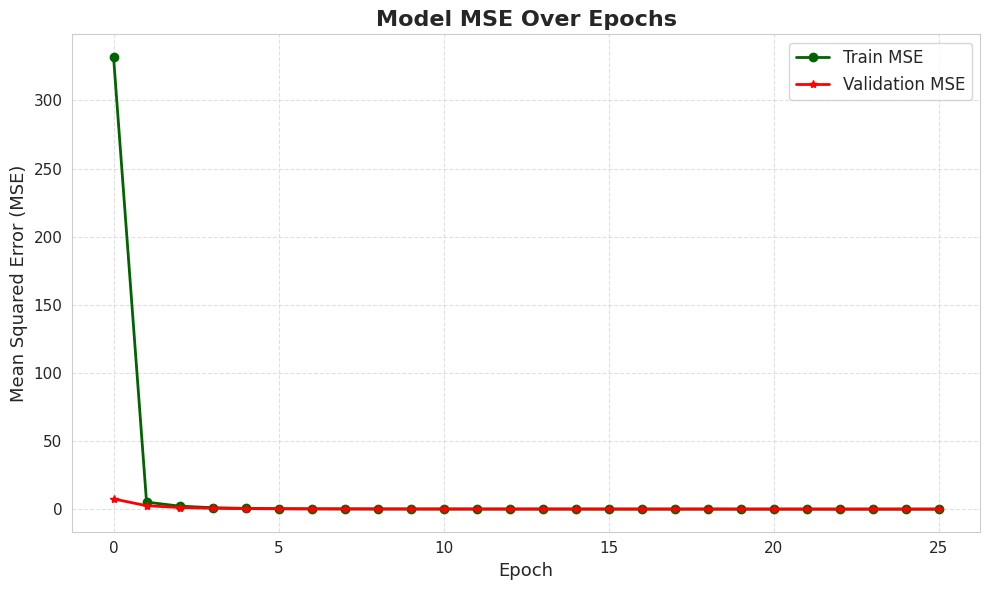

In [ ]:
train_mse = history.history["mse"]
val_mse   = history.history["val_mse"]

# Plot
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")

plt.plot(epochs, train_mse, label="Train MSE", color="darkgreen", linewidth=2, marker="o")
plt.plot(epochs, val_mse,   label="Validation MSE", color="red", linewidth=2, marker="*")
plt.title("Model MSE Over Epochs", fontsize=16, fontweight="bold")
plt.xlabel("Epoch", fontsize=13)
plt.ylabel("Mean Squared Error (MSE)", fontsize=13)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.legend(fontsize=12)
plt.grid(True, linestyle="--", alpha=0.6)

plt.tight_layout()
plt.show()


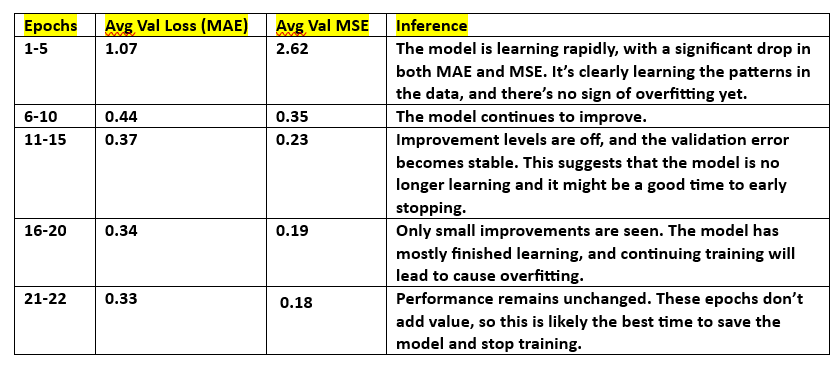

### **Hyperparametr tunning**

In [ ]:
model.evaluate(X_train, y_train)

4450/4450 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - loss: 0.3130 - mse: 0.1531


[0.31345194578170776, 0.15604008734226227]

In [ ]:
model.evaluate(X_val, y_val)

495/495 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.3187 - mse: 0.1557


[0.3164060711860657, 0.1556677520275116]

In [ ]:
!pip install keras-tuner -q

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
import keras_tuner

In [ ]:
def build_model(hp):
    model = keras.Sequential()
    model.add(layers.Flatten(input_shape=(input_dim,)))

    for i in range(hp.Int("num_layers", 1, 3)):
        model.add(
            layers.Dense(
                units=hp.Int(f"units_{i}", 32, 512, 32),
                activation=hp.Choice("activation", ["relu", "tanh"]),
            )
        )

    if hp.Boolean("dropout"):
        model.add(layers.Dropout(0.25))

    model.add(layers.Dense(1))

    lr = hp.Float("lr", 1e-4, 1e-2, sampling="log")
    model.compile(
        optimizer=keras.optimizers.Adam(lr),
        loss="mae",
        metrics=["mse"],
    )
    return model


In [ ]:
build_model(keras_tuner.HyperParameters())

<Sequential name=sequential_2, built=True>

In [ ]:

tuner = keras_tuner.RandomSearch(
    build_model,
    objective="val_loss",
    max_trials=20,
    overwrite=True,
    directory="tuner",
    project_name="porter_eta",
)

tuner.search(X_train, y_train,
             validation_data=(X_val, y_val),
             batch_size=256,
             epochs=20)


Trial 20 Complete [00h 03m 41s]
val_loss: 0.3398130536079407

Best val_loss So Far: 0.2976180911064148
Total elapsed time: 00h 44m 09s


In [ ]:
tuner.results_summary(num_trials=5)

best_hp = tuner.get_best_hyperparameters(num_trials=1)[0]

print("\nBest hyper‑parameters found:")
for name, value in best_hp.values.items():
    print(f"{name:15s}: {value}")




Results summary
Results in tuner/porter_eta
Showing 5 best trials
Objective(name="val_loss", direction="min")

Trial 02 summary
Hyperparameters:
num_layers: 2
units_0: 352
activation: relu
dropout: False
lr: 0.0004620103367161398
units_1: 224
units_2: 224
Score: 0.2976180911064148

Trial 11 summary
Hyperparameters:
num_layers: 3
units_0: 416
activation: tanh
dropout: False
lr: 0.0005162885734768005
units_1: 224
units_2: 352
Score: 0.3093002438545227

Trial 13 summary
Hyperparameters:
num_layers: 2
units_0: 352
activation: tanh
dropout: False
lr: 0.0012564412521369585
units_1: 256
units_2: 96
Score: 0.3143613934516907

Trial 14 summary
Hyperparameters:
num_layers: 3
units_0: 384
activation: relu
dropout: False
lr: 0.000548226109050801
units_1: 224
units_2: 384
Score: 0.32112783193588257

Trial 10 summary
Hyperparameters:
num_layers: 3
units_0: 256
activation: tanh
dropout: False
lr: 0.00014379196954005186
units_1: 512
units_2: 224
Score: 0.3343440592288971

Best hyper‑parameters found:


In [ ]:
best_model = tuner.get_best_models(num_models=1)[0]
best_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 20)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 352)            │         7,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 224)            │        79,072 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │           225 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 86,689 (338.63 KB)

 Trainable params: 86,689 (338.63 KB)

 Non-trainable params: 0 (0.00 B)

**Questionair**
1.	Defining the problem statements and where can this and modifications of this be used?
 - -The problem is to predict delivery time (ETA) for food orders using features like order details, restaurant info, and delivery partner availability.
This is a regression problem, where the goal is to estimate a continuous value (time in minutes).

- Use Cases:
 - Food delivery apps (Swiggy, Zomato)
 - E-commerce delivery (Amazon, Flipkart)
 - Taxi arrival time prediction (Uber, Ola)



2.	List 3 functions the pandas datetime provides with one line explanation.
 - .dt.hour : Extracts the hour from datetime.
 - .dt.weekday : Returns the day of the week as an integer (0=Monday).
 - .dt.total_seconds() : Converts timedelta to total seconds as float.

3.	Short note on datetime, timedelta, time span (period)
 - datetime: A specific point in time (exa. 2024-06-18 10:00).
 - timedelta: The difference between two datetime values (exa. 2 hours).
 - Period: Represents a span like "May 2025" or "Q1 2023".

4.	Why do we need to check for outliers in our data?
 - Outliers can disturb model training, affect loss, and reduce accuracy.
 - For example, if most delivery times are under 60 minutes but one is 500 minutes, that strange value can affect the average, confuse the model, and make predictions worse. Outlier treatment helps the model learn more accurately.
5.	Name 3 outlier removal methods?
 - Z-score method
 - IQR (Interquartile Range) method
 - Isolation Forest.

6.	What classical machine learning methods can we use for this problem?
 - Linear Regression : to create a simple baseline model using all features.
 - Decision Tree Regressor : to capture non-linear patterns.
 - Random Forest or Gradient Boosting (XGBoost) : for higher accuracy by combining multiple decision trees.

7.	Why is scaling required for neural networks?
 - Scaling is needed for neural networks because it helps the model learn faster and better.
 - If features have very different ranges (like one column from 1-10 and another from 1,000-10,000), the network gets confused and takes longer to find patterns. Scaling puts all features on a similar scale, making training more stable and accurate

8.	Briefly explain your choice of optimizer.
- I used Adam, which combines the benefits of AdaGrad and RMSprop.
It adapts learning rates for each parameter and works well for noisy or sparse data.

9.	Which activation function did you use and why?
- I used ReLU, as it is computationally efficient and reduces vanishing gradients.It introduces non-linearity and performs well.
10.	Why does a neural network perform well on a large dataset?
- With large data, The Neural network learns diverse patterns, reducing overfitting.Neural models require large data to generalize well and optimize complex functions.
